In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, classification_report, cohen_kappa_score
import matplotlib.pyplot as plt
import nltk
import textblob 
import ast
import joblib
import re
import string
import warnings

/Users/puttu/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
warnings.filterwarnings('ignore')

In [3]:
# Load the Datasets in


In [4]:
yelp_train_businesses = pd.read_csv("yelp_cleaned_csv_dataset/yelp_train_businesses.csv")
yelp_train_tips = pd.read_csv("yelp_cleaned_csv_dataset/yelp_train_tips.csv")
yelp_train_reviews = pd.read_csv("yelp_cleaned_csv_dataset/yelp_train_reviews.csv")

In [5]:
yelp_validate_businesses = pd.read_csv("yelp_cleaned_csv_dataset/yelp_validate_businesses.csv")
yelp_validate_tips = pd.read_csv("yelp_cleaned_csv_dataset/yelp_validate_tips.csv")
yelp_validate_reviews = pd.read_csv("yelp_cleaned_csv_dataset/yelp_validate_reviews.csv")

In [6]:
yelp_test_businesses = pd.read_csv("yelp_cleaned_csv_dataset/yelp_test_businesses.csv")
yelp_test_tips = pd.read_csv("yelp_cleaned_csv_dataset/yelp_test_tips.csv")
yelp_test_reviews = pd.read_csv("yelp_cleaned_csv_dataset/yelp_test_reviews.csv")

In [7]:
def frequency_dict(df): 
    df_attributes = dict(df['attributes'])
    attributes_counter = dict()
    for i in range(len(df_attributes)):
        real_dict_attributes = dict(ast.literal_eval(df_attributes[i]))
        for attribute in real_dict_attributes.keys():
            if attribute not in attributes_counter:
                attributes_counter[attribute] = 1
            else:
                attributes_counter[attribute] += 1

    attributes_counter = dict(sorted(attributes_counter.items(), key=lambda item: item[1], reverse=True))

    return attributes_counter



In [8]:
attributes_train_businesses = frequency_dict(yelp_train_businesses)
attributes_validate_business = frequency_dict(yelp_validate_businesses)
attributes_test_businesses = frequency_dict(yelp_test_businesses)

In [9]:
def retrieve_attribute_from_df(df, attribute):
    filtered_df = df[df['attributes'].str.contains(attribute)][['business_id', 'review_count', 'attributes']]
    df_attributes = dict(filtered_df['attributes'])
    
    attribute_values = []

    for key in df_attributes.keys():
        real_dict_attributes = dict(ast.literal_eval(df_attributes[key]))
        attribute_values.append(real_dict_attributes[attribute])

            
    filtered_df['attribute_value'] = attribute_values

    return filtered_df[filtered_df['attribute_value'] != 'None']

    

In [10]:
# Plan to Predict the Following Attributes
    # BusinessAcceptsCreditCards
    # RestaurantsTakeOut
    # RestaurantsReservations
    # GoodForKids
    # RestaurantsPriceRange2

## got the 5 most frequent attributes

In [11]:
yelp_train_businesses_priceRange2 = retrieve_attribute_from_df(yelp_train_businesses, 'RestaurantsPriceRange2')
yelp_validate_businesses_priceRange2 = retrieve_attribute_from_df(yelp_validate_businesses, 'RestaurantsPriceRange2')
yelp_test_businesses_priceRange2 = retrieve_attribute_from_df(yelp_test_businesses, 'RestaurantsPriceRange2')

In [12]:
yelp_train_businesses_takeOut = retrieve_attribute_from_df(yelp_train_businesses, 'RestaurantsTakeOut')
yelp_validate_businesses_takeOut = retrieve_attribute_from_df(yelp_validate_businesses, 'RestaurantsTakeOut')
yelp_test_businesses_takeOut = retrieve_attribute_from_df(yelp_test_businesses, 'RestaurantsTakeOut')


In [13]:
yelp_train_businesses_reservations = retrieve_attribute_from_df(yelp_train_businesses, 'RestaurantsReservations')
yelp_validate_businesses_reservations = retrieve_attribute_from_df(yelp_validate_businesses, 'RestaurantsReservations')
yelp_test_businesses_reservations = retrieve_attribute_from_df(yelp_test_businesses, 'RestaurantsReservations')

In [14]:
yelp_train_businesses_Kids = retrieve_attribute_from_df(yelp_train_businesses, 'GoodForKids')
yelp_validate_businesses_Kids = retrieve_attribute_from_df(yelp_validate_businesses, 'GoodForKids')
yelp_test_businesses_Kids = retrieve_attribute_from_df(yelp_test_businesses, 'GoodForKids')

In [15]:
yelp_train_businesses_creditCards = retrieve_attribute_from_df(yelp_train_businesses, 'BusinessAcceptsCreditCards')
yelp_validate_businesses_creditCards = retrieve_attribute_from_df(yelp_validate_businesses, 'BusinessAcceptsCreditCards')
yelp_test_businesses_creditCards = retrieve_attribute_from_df(yelp_test_businesses, 'BusinessAcceptsCreditCards')

In [16]:
# 3454698

# 5242692

In [17]:
# def process_text(text):
#     text = str(text).lower()
#     text = re.sub(
#         f"[{re.escape(string.punctuation)}]", " ", text
#     )
#     text = " ".join(text.split())
#     return text

# yelp_train_tips['clean_text'] = yelp_train_tips.text.map(process_text)
# yelp_validate_tips['clean_text'] = yelp_validate_tips.text.map(process_text)
# yelp_test_tips['clean_text'] = yelp_test_tips.text.map(process_text)

# yelp_train_reviews['clean_text'] = yelp_train_reviews.text.map(process_text)
# yelp_validate_reviews['clean_text'] = yelp_validate_reviews.text.map(process_text)
# yelp_test_reviews['clean_text'] = yelp_test_reviews.text.map(process_text)


In [31]:
yelp_train_reviews.to_csv("yelp_cleaned_csv_dataset/yelp_train_reviews.csv")
yelp_validate_reviews.to_csv("yelp_cleaned_csv_dataset/yelp_validate_reviews.csv")
yelp_test_reviews.to_csv("yelp_cleaned_csv_dataset/yelp_test_reviews.csv")

In [18]:
vec = CountVectorizer(
    ngram_range=(1, 3), 
    stop_words="english",
)

In [19]:
def build_model(df_train, df_test, business_train_df, business_test_df):
    yelp_filtered_train = df_train[df_train['business_id'].isin(business_train_df['business_id'])]
    yelp_filtered_test = df_test[df_test['business_id'].isin(business_test_df['business_id'])]
    X_train = vec.fit_transform(yelp_filtered_train.clean_text)
    X_test = vec.transform(yelp_filtered_test.clean_text)

    yelp_filtered_train = yelp_filtered_train.merge(business_train_df[['business_id', 'attribute_value']], on = 'business_id', how = 'inner')
    yelp_filtered_test = yelp_filtered_test.merge(business_test_df[['business_id', 'attribute_value']], on = 'business_id', how = 'inner')

    y_train = yelp_filtered_train.attribute_value
    y_test = yelp_filtered_test.attribute_value

    nb = MultinomialNB()
    nb.fit(X_train, y_train)

    preds = nb.predict(X_test)

    print(accuracy_score(y_test, preds))
    print(classification_report(y_test, preds))

    return y_test, preds


In [20]:
takeOut_test, takeOut_preds = build_model(yelp_train_tips, yelp_test_tips, yelp_train_businesses_takeOut, yelp_test_businesses_takeOut)

0.9537988449711243
              precision    recall  f1-score   support

       False       0.00      0.00      0.00      1230
        True       0.95      1.00      0.98     25436

    accuracy                           0.95     26666
   macro avg       0.48      0.50      0.49     26666
weighted avg       0.91      0.95      0.93     26666



In [21]:
priceRange2_test, priceRange2_preds = build_model(yelp_train_tips, yelp_test_tips, yelp_train_businesses_priceRange2, yelp_test_businesses_priceRange2)

0.6602690811706944
              precision    recall  f1-score   support

           1       0.30      0.00      0.01      8712
           2       0.66      1.00      0.80     20756
           3       0.00      0.00      0.00      1651
           4       0.00      0.00      0.00       247

    accuracy                           0.66     31366
   macro avg       0.24      0.25      0.20     31366
weighted avg       0.52      0.66      0.53     31366



In [22]:
Kids_test, Kids_preds = build_model(yelp_train_tips, yelp_test_tips, yelp_train_businesses_Kids, yelp_test_businesses_Kids)

0.8313391368771995
              precision    recall  f1-score   support

       False       0.17      0.00      0.00      4538
        True       0.83      1.00      0.91     22457

    accuracy                           0.83     26995
   macro avg       0.50      0.50      0.45     26995
weighted avg       0.72      0.83      0.76     26995



In [23]:
rese_test, reservations_preds =  build_model(yelp_train_tips, yelp_test_tips, yelp_train_businesses_reservations, yelp_test_businesses_reservations)

0.5862703634085213
              precision    recall  f1-score   support

       False       0.61      0.89      0.72     15565
        True       0.40      0.12      0.18      9971

    accuracy                           0.59     25536
   macro avg       0.51      0.50      0.45     25536
weighted avg       0.53      0.59      0.51     25536



In [24]:
creditCards_test, creditCards_preds = build_model(yelp_train_tips, yelp_test_tips, yelp_train_businesses_creditCards, yelp_test_businesses_creditCards)

0.9702507437314067
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       980
        True       0.97      1.00      0.98     31962

    accuracy                           0.97     32942
   macro avg       0.49      0.50      0.49     32942
weighted avg       0.94      0.97      0.96     32942



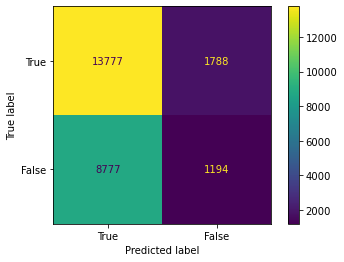

In [26]:
reservations_matrix = confusion_matrix(rese_test, reservations_preds)
ConfusionMatrixDisplay(confusion_matrix = reservations_matrix, display_labels = [True, False]).plot()

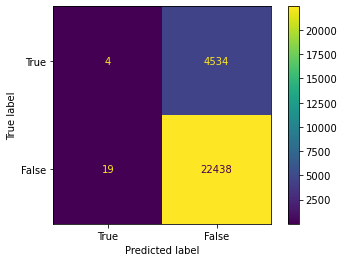

In [27]:
Kids_matrix = confusion_matrix(Kids_test, Kids_preds)
ConfusionMatrixDisplay(confusion_matrix = Kids_matrix, display_labels = [True, False]).plot()

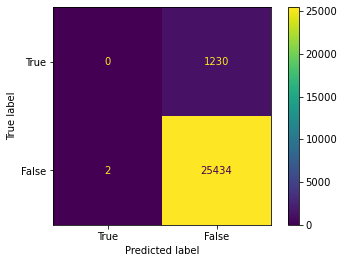

In [28]:
takeOut_matrix = confusion_matrix(takeOut_test, takeOut_preds)
ConfusionMatrixDisplay(confusion_matrix = takeOut_matrix, display_labels = [True, False]).plot()

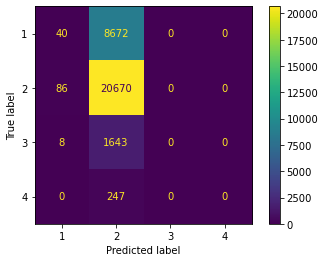

In [29]:
priceRange2_matrix = confusion_matrix(priceRange2_test, priceRange2_preds)
ConfusionMatrixDisplay(confusion_matrix = priceRange2_matrix, display_labels = [1, 2, 3, 4]).plot()

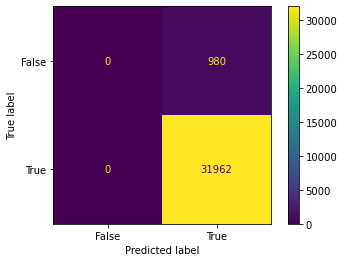

In [30]:
creditCards_matrix = confusion_matrix(creditCards_test, creditCards_preds)
ConfusionMatrixDisplay(confusion_matrix = creditCards_matrix, display_labels = [False, True]).plot()

In [ ]:
# Hyperparameters


In [76]:
yelp_test_businesses_priceRange2.groupby(['attribute_value'])['attribute_value'].agg('count')

attribute_value
1    4851
2    8567
3    1078
4     175
Name: attribute_value, dtype: int64

In [ ]:
attributes_validate_business

In [ ]:
attributes_test_businesses

In [ ]:
attributes_train_businesses

In [ ]:
'''
Task 1:
Predict business attributes by using Review and Tip
textual information.
Something more interesting?
• Noise removal?
• Sampling?
• Extracting name entities and opinion from the text?
• Focusing on most useful reviews/tips?
• Sentiment scores can be useful?
'''

In [ ]:
# Part 1 - Predict business attributes by using Review and Tip textual information

''' 
You need to create your own training and testing sets
(e.g., for business has more than 50 reviews + tips and
more than 3 attributes); you may need to focus on
popular attributes
'''
# Part 2 - Our own task

In [ ]:
# Models - NLTK

# Hyperparameter Tuning

# Error Histograms?